___
# Projeto 2
### Identificação de Distribuições

### Ana Capriles
___

O objetivo deste projeto é identificar quais distribuições (funções de densidade de probabilidade - no caso
contínuo, ou funções de probabilidade - no caso discreto) descrevem melhor variáveis quantitativas extraídas de um dataset
contendo a expectativa de vida de quase todos os país do mundo entre 1800 e 2013.
O resultado final esperado é identificar, com bons argumentos, a escolha de um ou mais
modelos probabilísticos para ajuste de uma variável quantitativa extraída do dataset.

In [146]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [147]:
df = pd.read_excel('Life.xlsx')

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [148]:
d = pd.DataFrame()

d['A1801'] = sorted(df.A1801)
d['A1941'] = sorted(df.A1941)
d['A2000'] = sorted(df.A2000)

d =  d.dropna()

d.A1801 = sorted(d.A1801)
d.A1941 = sorted(d.A1941)
d.A2000 = sorted(d.A2000)

In [195]:
d.shape

(172, 3)

## Análise Descritiva

Verificando se os três anos escolhidos possuem diferentes distribuições por meio dos histogramas. Os eixos dos três gráficos foram 
deixados com igual comprimento para que se possa comparar a evolução na distribuição da expectativa de vida nos 3 anos estudados.

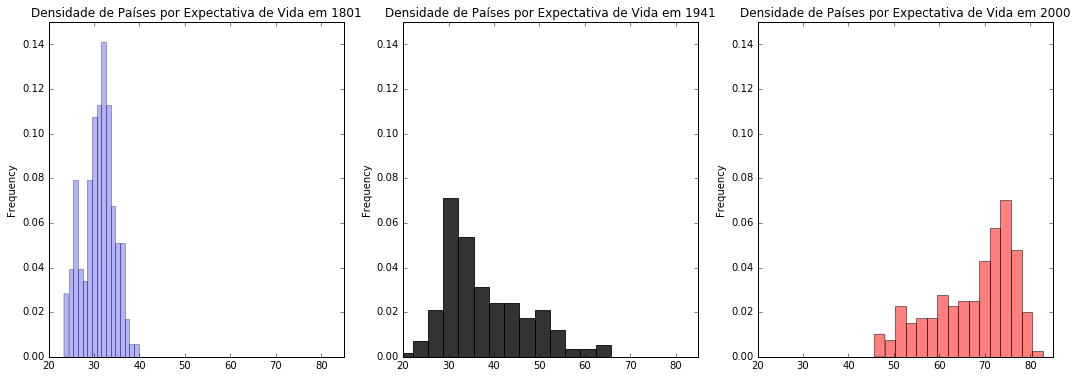

In [149]:
plt.subplot(1,3,1)
plot = d.A1801.plot.hist(title='Densidade de Países por Expectativa de Vida em 1801', color = ('blue'), figsize=(18, 6), bins = 16, normed = 1, alpha = 0.3)
plt.axis([20,85,0,0.15])
plt.subplot(1,3,2)
plot = d.A1941.plot.hist(title='Densidade de Países por Expectativa de Vida em 1941', color = ('black'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.8)
plt.axis([20,85,0,0.15])
plt.subplot(1,3,3)
plot = d.A2000.plot.hist(title='Densidade de Países por Expectativa de Vida em 2000', color = ('red'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.5)
plt.axis([20,85,0,0.15])
plt.show()

Sobrepondo os histogramas:

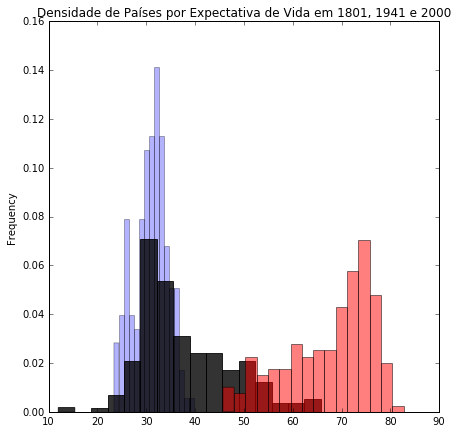

In [150]:
plot = d.A1801.plot.hist(title='Densidade de Países por Expectativa de Vida em 1801, 1941 e 2000', color = ('blue'), figsize=(7, 7), bins = 16, normed = 1, alpha = 0.3)
plot = d.A1941.plot.hist(color = ('black'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.8)
plot = d.A2000.plot.hist(color = ('red'),  figsize=(7, 7), bins=16, normed = 1, alpha = 0.5)
plt.show()

Medidas-resumo:

In [151]:
print(d.A1801.describe())
print(d.A1941.describe())
print(d.A2000.describe())

count    172.000000
mean      30.928506
std        3.390466
min       23.387000
25%       28.875000
50%       31.250000
75%       33.025000
max       39.860000
Name: A1801, dtype: float64
count    172.000000
mean      37.673182
std        9.453146
min       12.000000
25%       31.000000
50%       34.699300
75%       44.232398
max       65.736026
Name: A1941, dtype: float64
count    172.000000
mean      67.404099
std        8.762231
min       45.700000
25%       61.050000
50%       70.100000
75%       74.125000
max       82.700000
Name: A2000, dtype: float64


QQ-Plots de todas as combinações entre os anos:

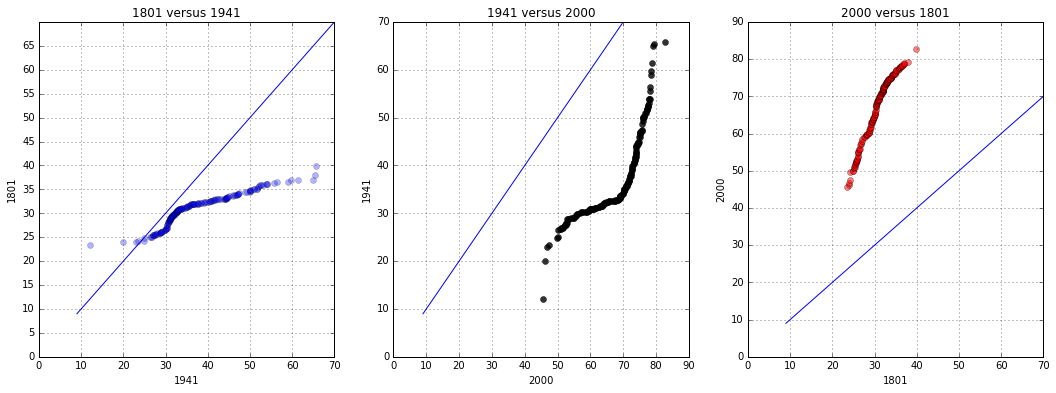

In [152]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot((9,70), (9,70))
plt.plot(d.A1941, d.A1801, 'ro', c='blue', alpha=0.3)
plt.xlabel('1941')
plt.ylabel('1801')
plt.yticks(np.arange(0, 70, 5))
plt.grid()
plt.title('1801 versus 1941')

plt.subplot(132)
plt.plot((9,70), (9,70))
plt.plot(d.A2000, d.A1941, 'ro', c='black', alpha=0.8)
plt.xlabel('2000')
plt.ylabel('1941')
plt.grid()
plt.title('1941 versus 2000')

plt.subplot(133)
plt.plot((9,70), (9,70))
plt.plot(d.A1801, d.A2000, 'ro', c='red', alpha=0.5)
plt.xlabel('1801')
plt.ylabel('2000')
plt.grid()
plt.title('2000 versus 1801')
plt.show()

É possível verificar que, de 1801 para 1941 e depois para 2000, a média da expectativa de vida aumentou bastante. A média era de 30.92 anos em
1801 e passou a ser 67.40 anos em 2000.
A variância aumentou bastante do ano 1801 para o ano 1941 e teve uma queda bem pequena do ano 1941 para o ano 2000.
Além disso, os QQ-Plots informam que todas as expectativas são maiores para todos os países em anos mais recentes, exceto quando se compara 1801 com 1941.
Neste último caso, pode-se afirmar que para menos de um quarto de todos os países considerados na amostra as expectativas de vida são
maiores em 1801, isto pois a intersecção com a bissetriz está entre 20 e 25 de frequência, e sabe-se pela tabela de medidas-resumo
que o primeiro quartil para 1801 se encontra na expectativa de 28.875 anos. Isto é o que se pode afirmar com base no primeiro quartil, porém
olhando o gráfico é possível notar que na verdade são muito menos do que 25% dos valores.

### Aderência de um modelo probabilístico normal aos dados

O primeiro passo é sobrepor o histograma das amostras a uma curva normal obtida teoricamente com os parâmetros da média e do desvio padrão obtidos empiricamente para
e observar visualmente quão aderidas as curvas ficam uma à outra.

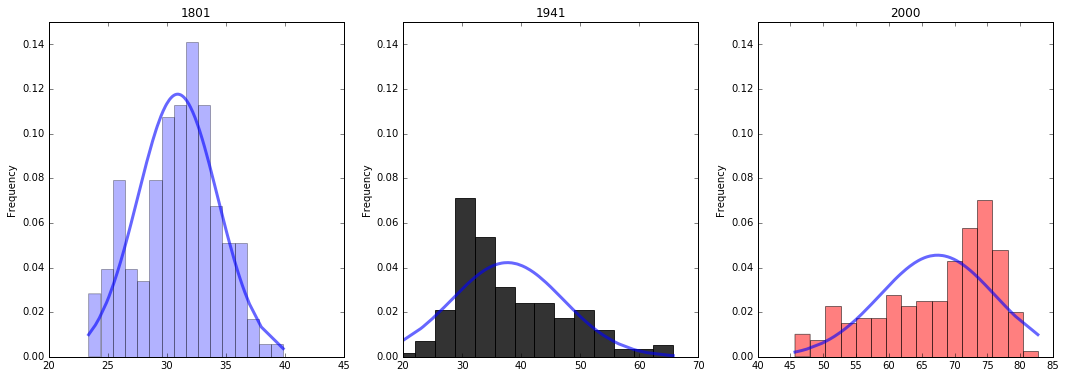

In [194]:
mu1801 = 30.928506
sigma1801 = 3.390466

mu1941 = 37.673182
sigma1941 = 9.453146

mu2000 = 67.404099
sigma2000 = 8.762231

plt.subplot(1,3,1)
plot = d.A1801.plot.hist(title='1801', color = ('blue'), figsize=(18, 6), bins = 16, normed = 1, alpha = 0.3)
plt.plot(d.A1801, stats.norm.pdf(d.A1801, loc=mu1801, scale=sigma1801), lw=3, alpha=0.6)
plt.axis([20,45,0,0.15])
plt.subplot(1,3,2)
plot = d.A1941.plot.hist(title='1941', color = ('black'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.8)
plt.plot(d.A1941, stats.norm.pdf(d.A1941, loc=mu1941, scale=sigma1941), lw=3, alpha=0.6)
plt.axis([20,70,0,0.15])
plt.subplot(1,3,3)
plot = d.A2000.plot.hist(title='2000', color = ('red'),  figsize=(18, 6), bins=16, normed = 1, alpha = 0.5)
plt.plot(d.A2000, stats.norm.pdf(d.A2000, loc=mu2000, scale=sigma2000), lw=3, alpha=0.6)
plt.axis([40,85,0,0.15])
plt.show()

Visualmente, nota-se que a distribuição normal adere bem ao ano 1801, mas não aos anos 1941 e 2000, cujas distribuições são assimétricas pelos histogramas.

adequação dos dados a uma curva normal:

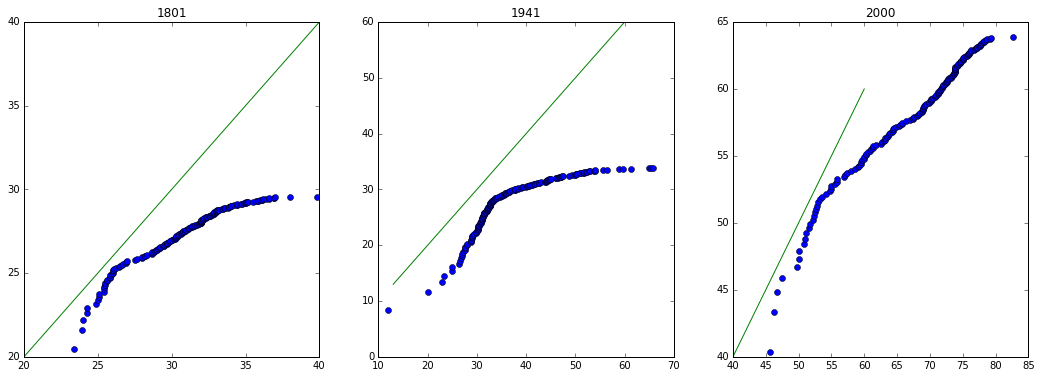

In [188]:
frequencias_relativas_acumuladas = []
for i in range(1,173):
    frequencias_relativas_acumuladas.append((i-0.5)/500)

quantis_teoricos_da_distribuicao_normal_1801 = []
for i in frequencias_relativas_acumuladas:
    quantis_teoricos_da_distribuicao_normal_1801.append(stats.norm.ppf(i, loc=mu1801, scale=sigma1801))

quantis_teoricos_da_distribuicao_normal_1941 = []
for i in frequencias_relativas_acumuladas:
    quantis_teoricos_da_distribuicao_normal_1941.append(stats.norm.ppf(i, loc=mu1941, scale=sigma1941))
    
quantis_teoricos_da_distribuicao_normal_2000 = []
for i in frequencias_relativas_acumuladas:
    quantis_teoricos_da_distribuicao_normal_2000.append(stats.norm.ppf(i, loc=mu2000, scale=sigma2000))

    
fig = plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(d.A1801, quantis_teoricos_da_distribuicao_normal_1801, 'o')
plt.plot((20,40),(20,40))
plt.title("1801")

plt.subplot(132)
plt.plot(d.A1941, quantis_teoricos_da_distribuicao_normal_1941, 'o')
plt.plot((13,60),(13,60))
plt.title("1941")

plt.subplot(133)
plt.plot(d.A2000, quantis_teoricos_da_distribuicao_normal_2000, 'o')
plt.plot((40,60),(40,60))
plt.title("2000")

plt.show()

Percebe-se que os dados não aderem bem ao modelo normal.

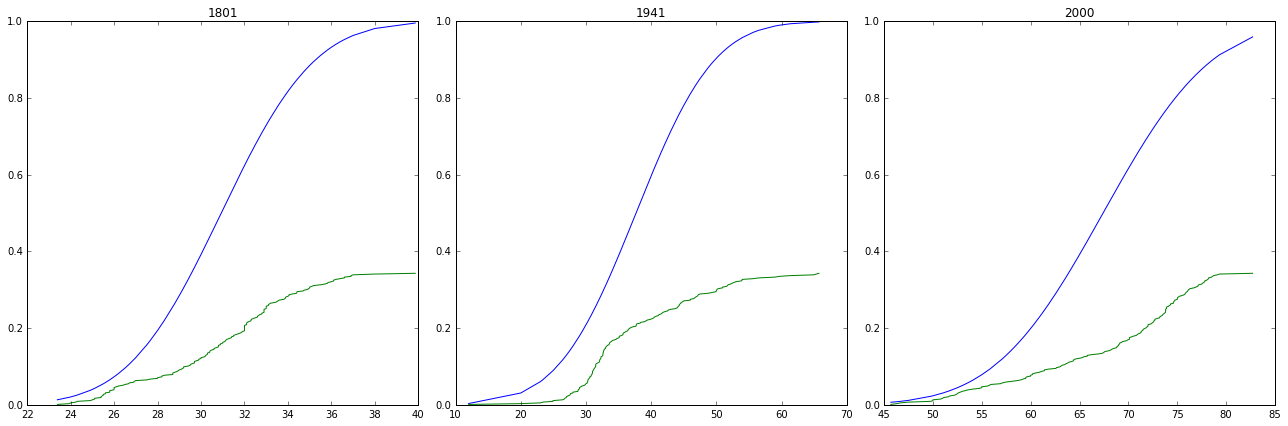

In [192]:
probabilidade_acumulada_1801 = []
for i in d.A1801:
    probabilidade_acumulada_1801.append(stats.norm.cdf(i, loc=mu1801, scale=sigma1801))

probabilidade_acumulada_1941 = []
for i in d.A1941:
    probabilidade_acumulada_1941.append(stats.norm.cdf(i, loc=mu1941, scale=sigma1941))
    
probabilidade_acumulada_2000 = []
for i in d.A2000:
    probabilidade_acumulada_2000.append(stats.norm.cdf(i, loc=mu2000, scale=sigma2000))


plt.figure(figsize=(18,6))    
plt.subplot(131)
plt.plot(d.A1801, probabilidade_acumulada_1801)
plt.plot(d.A1801, frequencias_relativas_acumuladas)
plt.title("1801")

plt.subplot(132)
plt.plot(d.A1941, probabilidade_acumulada_1941)
plt.plot(d.A1941, frequencias_relativas_acumuladas)
plt.title("1941")

plt.subplot(133)
plt.plot(d.A2000, probabilidade_acumulada_2000)
plt.plot(d.A2000, frequencias_relativas_acumuladas)
plt.title("2000")

plt.tight_layout()
plt.show()

___
### Aderência de um modelo probabilístico assimétrico aos dados

___
### Cálculo de probabilidades a partir da distribuição normal

Probabilidade de um país ter expectativa de vida superior a 70 anos:

In [193]:
(1 - stats.norm.cdf(70, loc=mu1801, scale=sigma1801))*100

0.0